In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [2]:
data = pd.read_csv('wine_train.csv', sep=';', engine='python') 

In [3]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
5,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
7,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
8,7.9,0.18,0.37,1.2,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5
9,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7


In [4]:
#Created a new column Review that will contain the values of 1,2 and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews.
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

In [5]:
x = data.iloc[:,:11] #Deleted the last "Quality" column from the data
y = data['Reviews']

In [6]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [7]:
from sklearn.preprocessing import StandardScaler #removing the mean & scaling to unit variance.
sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
from sklearn.decomposition import PCA 
pca = PCA() #PCA used to minimizing the dementionality to preserve good tarining set's variance.
x_pca = pca.fit_transform(x)

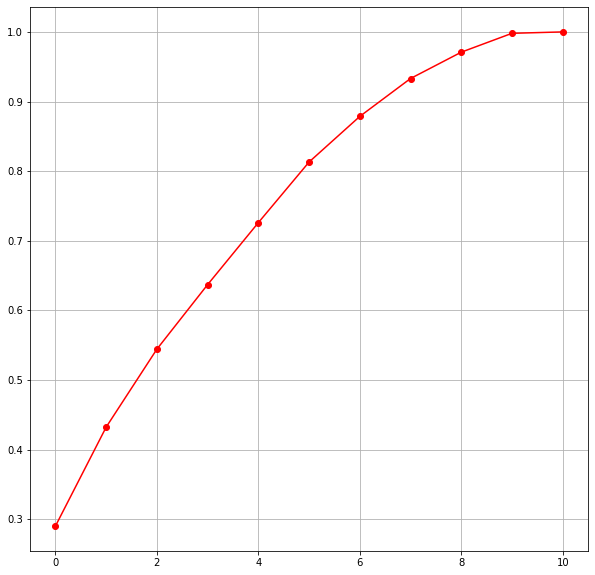

In [9]:
plt.figure(figsize=(10,10)) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [10]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [13]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, lr_predict))
print(RMSE)

0.19948914348241345


In [14]:
from sklearn.linear_model import LinearRegression
model =  LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_test)

In [15]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
print(RMSE)

0.19634242651178396
